<a href="https://colab.research.google.com/github/WelfLowe/ML4developers/blob/main/2%E2%80%93Naive_Bayes_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading the Iris datasets

The first steps are a copy of what we did in the $\verb|1-Data_and_learning|$ notebook.

Import necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.stats import norm
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split

Load Iris dataset and convert it into a $\verb|numpy|$ array.

In [2]:
iris = load_iris()
print(iris.data.shape)
print(iris.target.shape)
print(iris.feature_names) 

(150, 4)
(150,)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Convert it to a $\verb|pandas|$ dataframe.

In [3]:
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['species'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


Seperate the three classes.

In [4]:
def filter_by_species(species_id, verbose):
  s =  iris_df['species']==species_id
  s = iris_df[s]
  s = s.drop('species', axis=1)
  if verbose:
    print(s.head())
  return s

In [5]:
setosa = filter_by_species(0.0, True)
versicolor = filter_by_species(1.0, False)
virginica = filter_by_species(2.0, False)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


Boxplots of the feature values of the different species.

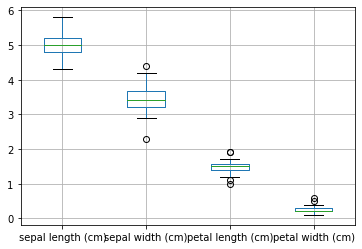

In [6]:
setosa.boxplot()

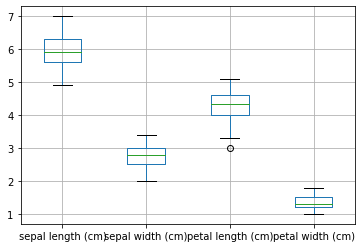

In [7]:
versicolor.boxplot()

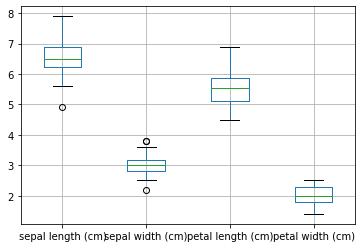

In [8]:
virginica.boxplot()

## Univariate case

Looking at the box plots, petal length seems to be a distinctive feature to separate the therr classes. Therefore, we pick this one for our simple unimodal classifier, i.e., a classifier just looking at one attribute.

We create numpy arrays of the petal length column (2) of the respective data frame.

In [9]:
# values converts it into a numpy array
# -1 means that calculate the dimension of rows, but have 1 column
setosa_petal_length = setosa.iloc[:, 2].values.reshape(-1, 1)  
versicolor_petal_length = versicolor.iloc[:, 2].values.reshape(-1, 1)  
virginica_petal_length = virginica.iloc[:, 2].values.reshape(-1, 1)  

Our training function merely uses the $\verb|fit|$ function that is predefined in the $\verb|norm|$ library. Note, that we imported the corresponding libarary: $\verb|from scipy.stats import norm|$.

Optionally, we then plot the trained model, a fitted normal distribution given by $\mu$ and $\sigma$ together with a histogram of all datapoints using again the plotting libarary.

In [10]:
def fit_normal(X, verbose):
    mu, std = norm.fit(X)
    if verbose:
        # Plot the histogram.
        plt.hist(X, bins=10, density=True, alpha=0.6, color='b')
        # Plot the PDF.
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mu, std)
        plt.plot(x, p, linewidth=2, color='red')
        title = "Fit Values: mu {:.2f} and sigma {:.2f}".format(mu, std)
        plt.title(title)
        plt.show()
    return mu, std

Then we can train the model.

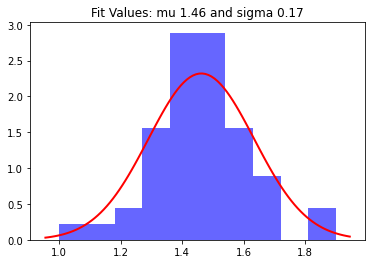

In [11]:
mu_setosa, sigma_setosa = fit_normal(setosa_petal_length, True)

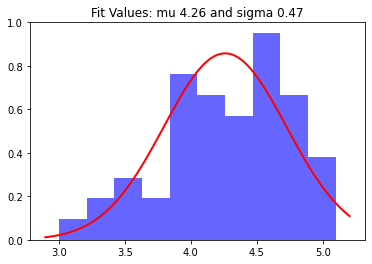

In [12]:
mu_versicolor, sigma_versicolor = fit_normal(versicolor_petal_length, True)

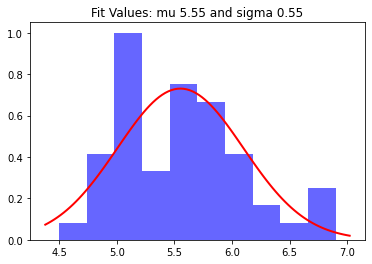

In [13]:
mu_virginica, sigma_virginica = fit_normal(virginica_petal_length, True)

We don't have any prior knowledge about the probability of each class. In the training data, it is one third of each class. Multiplication with this class probability does not chaneg the decision. Hence, our unimodal model is ready.

Let's visualize it. We define a visualization function ...

In [14]:
def plot_norm(mus, sigmas, cc):
    low = mus[0]-4*sigmas[0]
    high = mus[0]+4*sigmas[0]
    for i in range(1,len(mus)):
        low = min(low, mus[i]-4*sigmas[i])
        high = max(high, mus[i]+4*sigmas[i])
    x_axis = np.arange(low, high, 0.1)
    for i in range(0,len(mus)):
        plt.plot(x_axis, norm.pdf(x_axis, mus[i], sigmas[i]), cc[i])
    plt.show()

... call it for plotting the length distributions in one figure.

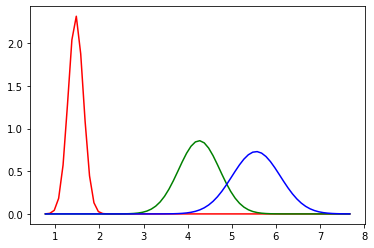

In [15]:
plot_norm([mu_setosa,mu_versicolor, mu_virginica],[sigma_setosa,sigma_versicolor, sigma_virginica], ['r','g','b'])

We define a function for using our model ...

In [16]:
def classify_unimodal (x, mus, sigmas, verbose):
  max_p = 0
  max_class = 0
  for i in range(0,len(mus)):
    p = norm.pdf(x, mus[i], sigmas[i])
    if p > max_p:
      max_p = p
      max_class = i
    if verbose:
      print(p)
  return max_p, max_class

... and test it.

In [17]:
classify_unimodal(4.5, [mu_setosa,mu_versicolor, mu_virginica],[sigma_setosa,sigma_versicolor, sigma_virginica], True)

3.606433780983755e-68
0.7507278747953492
0.11437879840353332


(0.7507278747953492, 1)

## Model validation

We need to test the model on datapoint that haven't been used for training. Hence, we need to split the data into training and test data sets, retrain on the training data set and test on the test data set.

In [18]:
setosa_petal_length_train, setosa_petal_length_test = train_test_split(setosa_petal_length)
versicolor_petal_length_train, versicolor_petal_length_test = train_test_split(versicolor_petal_length)
virginica_petal_length_train, virginica_petal_length_test = train_test_split(virginica_petal_length)
versicolor_petal_length_test.shape

(13, 1)

Retrain the model only on training data.

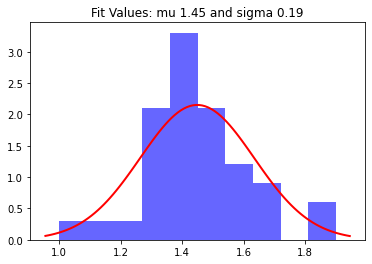

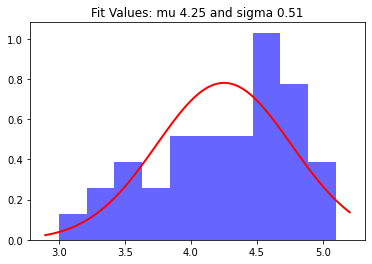

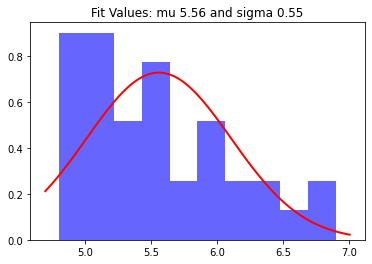

In [19]:
mu_setosa, sigma_setosa = fit_normal(setosa_petal_length_train, True)
mu_versicolor, sigma_versicolor = fit_normal(versicolor_petal_length_train, True)
mu_virginica, sigma_virginica = fit_normal(virginica_petal_length_train, True)

Plot and test the model.

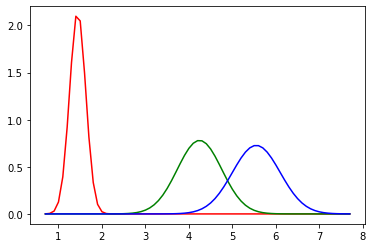

2.0703470304623885
4.0201696406789726e-07
9.606121078850476e-13


(2.0703470304623885, 0)

In [20]:
plot_norm([mu_setosa,mu_versicolor, mu_virginica],[sigma_setosa,sigma_versicolor, sigma_virginica], ['r','g','b'])
classify_unimodal(1.5, [mu_setosa,mu_versicolor, mu_virginica],[sigma_setosa,sigma_versicolor, sigma_virginica], True)

Test on the test data set.

In [21]:
apply_model = lambda x: classify_unimodal(x, [mu_setosa,mu_versicolor, mu_virginica],[sigma_setosa,sigma_versicolor, sigma_virginica], False)
setosa_pred = np.vectorize(apply_model)(setosa_petal_length_test)[1]
versicolor_pred = np.vectorize(apply_model)(versicolor_petal_length_test)[1]
virginica_pred = np.vectorize(apply_model)(virginica_petal_length_test)[1]
setosa_pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

Build an plot a confusion matrix.

In [22]:
y_pred = np.concatenate((setosa_pred, versicolor_pred, virginica_pred), axis=0)
n = setosa_pred.shape[0]
y_act = np.concatenate((np.full((n, 1), 0), np.full((n, 1), 1), np.full((n, 1), 2)), axis=0)

In [23]:
cm = confusion_matrix(y_act, y_pred)
cm

array([[13,  0,  0],
       [ 0, 12,  1],
       [ 0,  2, 11]])

Below a function for plotting a nice confusion matrix given a sklearn confusion matrix (cm), copied from [Kaggle](https://www.kaggle.com/code/grfiv4/plot-a-confusion-matrix)

In [24]:
import itertools
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix
    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']
    title:        the text to display at the top of the matrix
    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues
    normalize:    If False, plot the raw numbers
                  If True, plot the proportions
    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

We use it on our data.

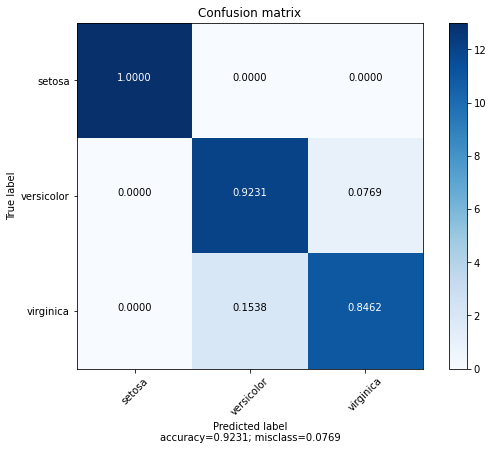

In [25]:
plot_confusion_matrix(cm, ['setosa', 'versicolor', 'virginica'])

## Multivariate case

We create numpy arrays of all feature of the respective data frame.

In [26]:
setosa_all = setosa.iloc[:, 0:4].values 
versicolor_all = versicolor.iloc[:, 0:4].values 
virginica_all = virginica.iloc[:, 0:4].values 

Training and test split of all data.

In [27]:
setosa_train, setosa_test = train_test_split(setosa_all)
versicolor_train, versicolor_test = train_test_split(versicolor_all)
virginica_train, virginica_test = train_test_split(virginica_all)

Training the model means fitting mean and standard deviation for each feature.

In [28]:
def fit_normal_multi(X):
  N = X.shape[1]
  model = np.zeros((N, 2))
  for i in range(0,N):
    mu, sigma = fit_normal(X[:,i], False)
    model[i,0] = mu
    model[i,1] = sigma
  return model

Training is called for each class separately.

In [29]:
setosa_model = fit_normal_multi(setosa_train)
versicolor_model = fit_normal_multi(versicolor_train)
virginica_model = fit_normal_multi(virginica_train)

Use the models to classify. Note that we avoid multiplication of near zero values by using $a \times b=\exp(\log(a\times b))=\exp(\log(a)+\log(b))$.

In [30]:
def classify_multi(x, models, verbose):
  max_p = 0
  max_class = 0
  for i in range(0,len(models)): #for all classes
    p=0
    model = models[i]
    for j in range(0,len(model)): #for all features
      p = p+ np.log(norm.pdf(x[j], model[j,0], model[j,1])) 
    p = np.exp(p)
    if p > max_p:
      max_p = p
      max_class = i
    if verbose:
      print(p)
  return max_p, max_class

Test model usage with a feature vector of ones.

In [31]:
classify_multi([1,1,1,1], [setosa_model,versicolor_model,virginica_model], True)

1.0909565610038411e-54
1.592742060959044e-39
8.281306911607106e-46


(1.592742060959044e-39, 1)

Define a fuction that can be applied on all feature verctor rows of the test dataset.

In [32]:
apply_model_multi = lambda x: classify_multi(x, [setosa_model,versicolor_model,virginica_model], False)

Classify the test dataset.

In [33]:
setosa_pred = np.apply_along_axis(apply_model_multi, 1, setosa_test)[:,1]
versicolor_pred = np.apply_along_axis(apply_model_multi, 1, versicolor_test)[:,1]
virginica_pred = np.apply_along_axis(apply_model_multi, 1, virginica_test)[:,1]

Build a confusion matrix.

In [34]:
y_pred = np.concatenate((setosa_pred, versicolor_pred, virginica_pred), axis=0)
cm = confusion_matrix(y_act, y_pred)
cm

array([[13,  0,  0],
       [ 0, 13,  0],
       [ 0,  2, 11]])

Visualize the confusion matrix.

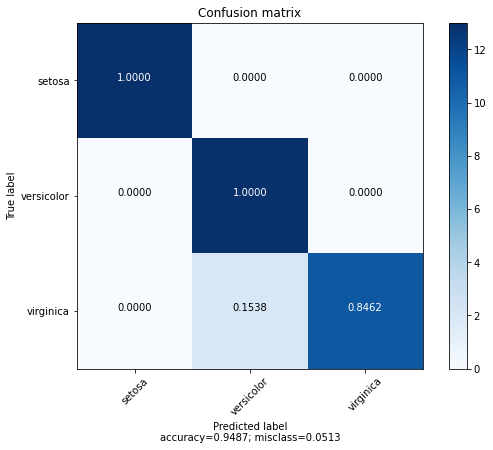

In [35]:
plot_confusion_matrix(cm, ['setosa', 'versicolor', 'virginica'])